In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [21]:
wine = pd.read_csv('wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [7]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [8]:
y = wine['quality']
X = wine.drop('quality', axis = 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
124,7.8,0.500,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
350,10.7,0.670,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
682,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
1326,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1259,6.8,0.640,0.00,2.70,0.123,15.0,33.0,0.99538,3.44,0.63,11.3
1295,6.6,0.630,0.00,4.30,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
1155,8.3,0.600,0.25,2.20,0.118,9.0,38.0,0.99616,3.15,0.53,9.8
963,8.8,0.270,0.39,2.00,0.100,20.0,27.0,0.99546,3.15,0.69,11.2


In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


array([[-3.33991288e-01,  2.42581186e-01, -9.63136787e-01, ...,
        -4.42561113e-01,  6.34928030e-02, -7.55088351e-01],
       [-2.78643172e-01, -9.49230728e-02, -4.94583756e-01, ...,
         5.19964189e-01, -1.15964614e+00, -8.44713081e-01],
       [ 1.32645219e+00,  8.61338994e-01, -2.34276516e-01, ...,
        -1.85887699e-01,  2.23796204e+00, -4.86214161e-01],
       ...,
       [-1.90259149e-03,  4.67584025e-01, -7.80921719e-02, ...,
        -1.02007629e+00, -8.19885325e-01, -5.75838891e-01],
       [ 2.74837989e-01, -1.38868940e+00,  6.50768099e-01, ...,
        -1.02007629e+00,  2.67349294e-01,  6.78907330e-01],
       [ 4.40882337e-01,  1.39572074e+00, -1.17138258e+00, ...,
        -1.21719346e-01, -7.51933161e-01, -6.65463621e-01]])

In [22]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
pred_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [12]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       273
           1       0.48      0.43      0.45        47

    accuracy                           0.85       320
   macro avg       0.69      0.67      0.68       320
weighted avg       0.84      0.85      0.84       320



In [13]:
cf=confusion_matrix(y_test, pred_dt)

In [14]:
print(cf)

[[251  22]
 [ 27  20]]


In [15]:
accuracy=((cf[0][0]+cf[1][1])/(cf[0][0]+cf[0][1]+cf[1][0]+cf[1][1]))

In [16]:
print("Accuracy is: ",(accuracy*100),"%")

Accuracy is:  84.6875 %


In [18]:
y_new = pd.DataFrame(y_test)
y_new1 = pd.DataFrame(pred_dt,columns=['quality'])

C:\Users\badal\AppData\Local\Temp\ipykernel_24196\290561704.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality',data=y_new,palette='hls')


<Axes: xlabel='quality', ylabel='count'>

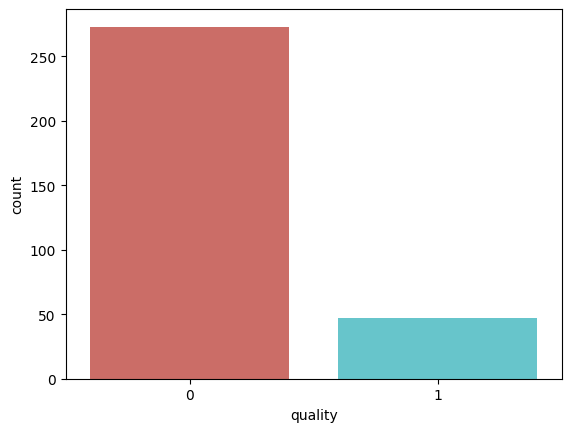

In [19]:
sns.countplot(x='quality',data=y_new,palette='hls')


C:\Users\badal\AppData\Local\Temp\ipykernel_24196\1834456704.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality',data=y_new1,palette='hls')


<Axes: xlabel='quality', ylabel='count'>

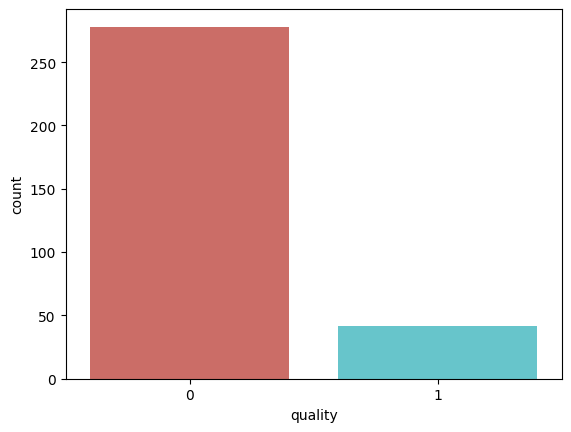

In [20]:
sns.countplot(x='quality',data=y_new1,palette='hls')

In [29]:
test = [[7.7,	0.560,	0.08,	2.50,	0.114,	14.0,	46.0,	0.99710,	3.24,	0.66,	9.6]]
pred_dt = dt.predict(test)
pred_dt

array([0])

In [30]:
import joblib
joblib.dump(dt,'quality_prediction.joblib')

['quality_prediction.joblib']